# 1. Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels



# 2. Importar set de entrenamiento

In [2]:
data_train = pd.read_json('train.json')
data_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
data_train['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [4]:
type(data_train['ingredients'][0])

list

Primero se necesita una columna con un string de ingredientes.

In [5]:
#data_train['ingr_lst'] = data_train['ingredients'].apply(lambda x: [item.replace(' ','') for item in x])

In [6]:
data_train['ingr_str'] = data_train['ingredients'].apply(lambda x: ' '.join(x))
data_train.head()

,cuisine,id,ingredients,ingr_str
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...


In [7]:
# data_train['ingr_str2'] = data_train['ingredients'].apply(lambda x: ' '.join(x))
# data_train.head()

In [8]:
data_train['cant_ingr'] = data_train['ingredients'].str.len()
# data_train.head()

 Vamos a eliminar las recetas vistas en el EDA que tienen sólo 1 ingrediente y aquellas mayores a 30

In [9]:
data_train.drop(index=data_train.loc[data_train['cant_ingr']>30].index, inplace=True)

In [10]:
data_train.drop(index=data_train.loc[data_train['cant_ingr']<2].index, inplace=True)

In [11]:
data_train.head()

,cuisine,id,ingredients,ingr_str,cant_ingr
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,12
3,indian,22213,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,20


In [12]:
data_train.shape

(39712, 5)

Ya que los ingredientes a veces vienen como 2 palabras juntas, se decidió tomar esta representación. Luego se harán pruebas tomando la otra columna.

In [13]:
X = data_train['ingr_str']
y = data_train['cuisine']

# 3. Split en Train y Test

Para armar y validar el modelo dividimos los datos del archivo 'train.json' en train y test. Luego de haber probado y elegido el mejor modelo posible, se realizarán predicciones sobre un nuevo set de datos del archivo 'test.json', del cual no se conocen las etiquetas.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [15]:
X.shape,y.shape

((39712,), (39712,))

In [16]:
X_train.shape,y_train.shape

((29784,), (29784,))

In [17]:
X_test.shape,y_test.shape

((9928,), (9928,))

In [18]:
y_train.value_counts()

italian         5876
mexican         4818
southern_us     3238
indian          2244
chinese         2003
french          1982
cajun_creole    1158
thai            1150
japanese        1064
greek            880
spanish          739
korean           623
vietnamese       617
moroccan         614
british          603
filipino         566
irish            500
jamaican         393
russian          367
brazilian        349
Name: cuisine, dtype: int64

In [19]:
y_test.value_counts()

italian         1958
mexican         1606
southern_us     1079
indian           748
chinese          668
french           661
cajun_creole     386
thai             383
japanese         355
greek            294
spanish          247
korean           207
vietnamese       206
moroccan         205
british          201
filipino         188
irish            167
jamaican         131
russian          122
brazilian        116
Name: cuisine, dtype: int64

# 4. Pruebas con CountVectorizer y TfidfVectorizer

In [20]:
# vec = CountVectorizer(lowercase=True,stop_words='english',token_pattern=r'(?u)\b\w\w\w+\b',
#                        ngram_range=(1,2),max_features=20000)

# X_train_vec = vec.fit_transform(X_train)
# X_test_vec = vec.transform(X_test)
# len(vec.get_feature_names())

In [21]:
# X_train_vec.shape

In [22]:
# X_test_vec.shape

In [23]:
# tfidf = TfidfVectorizer(lowercase=True,stop_words='english',token_pattern=r'(?u)\b\w\w\w+\b',
#                        ngram_range=(1,2),max_features=20000)

# X_train_tfidf = tfidf.fit_transform(X_train)
# X_test_tfidf = tfidf.transform(X_test)
# len(tfidf.get_feature_names())

In [24]:
# X_train_tfidf.shape

In [25]:
# X_test_tfidf.shape

In [26]:
# feat_selector=SelectPercentile(f_classif, percentile=15)
# feat_selector=feat_selector.fit(X_train_vec, y_train)
# X_train_vec=feat_selector.transform(X_train_vec)
# #CHEQUEAR VARIABLES QUE FITEAN Y TRANSFORMAN!!!!!!! 
# X_train_vec.shape

In [27]:
# feat_selector=SelectPercentile(f_classif, percentile=15)
# feat_selector=feat_selector.fit(X_train_tfidf, y_train)
# X_train_tfidf=feat_selector.transform(X_train_tfidf)
# X_train_tfidf.shape

In [28]:
# X_test_vec=feat_selector.transform(X_test_vec)

In [29]:
# X_test_tfidf=feat_selector.transform(X_test_tfidf)

In [30]:
#vec.vocabulary_
#tfidf.vocabulary

# 5. Pruebas con Logistic Regresion

In [31]:
# # Modelo Features tratadas con Countvectorizer
# modelo_LR_vec = LogisticRegression()
# modelo_LR_vec.fit(X_train_vec, y_train)
# y_pred_LR_vec = modelo_LR_vec.predict(X_test_vec)

# print("Accuracy sobre Train: {}".format(accuracy_score(y_train, modelo_LR_vec.predict(X_train_vec))))
# print("Accuracy sobre Test: {}".format(accuracy_score(y_test, y_pred_LR_vec)))



In [32]:
# # Modelo Features tratadas con tfidf

# modelo_LR_tfidf = LogisticRegression()
# modelo_LR_tfidf.fit(X_train_tfidf, y_train)
# y_pred_tfidf = modelo_LR_tfidf.predict(X_test_tfidf)

# print("Accuracy sobre Train: {}".format(accuracy_score(y_train, modelo_LR_tfidf.predict(X_train_tfidf))))
# print("Accuracy sobre Test: {}".format(accuracy_score(y_test, y_pred_tfidf)))


# 6. Búsqueda de los mejores parámetros


Se probarán los parámetros del vectorizer:
 - max_features
 - ngram_range
 - stop_words
 - binary
 - token_pattern

In [33]:
pipeline1 = Pipeline([
   ('vect', CountVectorizer()), 
    ('ftr', SelectPercentile()),
   ('clf', LogisticRegression()), 
   ])

pipeline2 = Pipeline([ 
   ('vect', TfidfVectorizer()), 
   ('ftr', SelectPercentile()),
   ('clf', LogisticRegression()),
   
])


In [34]:
parameters = {
    'vect__max_features': [5000,10000,15000],
    'vect__ngram_range' : [(1,1),(1,2)],
    'vect__stop_words': ['english'],
    'vect__binary': [True,False],
    'vect__token_pattern' : [r'(?u)\b\w\w\w+\b'],
    'clf__class_weight': ['balanced'],
    'clf__C': [1, 10, 100, 1000],
    'ftr__percentile':[10,15,20],
    'ftr__score_func':[f_classif], 
}

In [35]:
random_search1 = RandomizedSearchCV (pipeline1, parameters,n_iter=10, n_jobs = 4 , verbose = 2 , cv=3,random_state=15)
random_search2 = RandomizedSearchCV (pipeline2, parameters,n_iter=10, n_jobs = 4 , verbose = 2 , cv=3,random_state=15)


In [36]:
print("Performing Randomized Search 1...") 
random_search1.fit(X_train, y_train)

print("Best score: %0.3f" % random_search1.best_score_) 
print("Best parameters set:" )
best_parameters = random_search1.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Performing Randomized Search 1...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 10.4min finished
C:\Users\JAVI\Miniconda3\envs\dhds\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAVI\Miniconda3\envs\dhds\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best score: 0.730
Best parameters set:
	 clf__C: 10
	 clf__class_weight: 'balanced'
	 ftr__percentile: 15
	 ftr__score_func: <function f_classif at 0x000001870D751488>
	 vect__binary: False
	 vect__max_features: 10000
	 vect__ngram_range: (1, 2)
	 vect__stop_words: 'english'
	 vect__token_pattern: '(?u)\\b\\w\\w\\w+\\b'


In [37]:
print("Performing Randomized Search 2...") 
random_search2.fit(X_train, y_train)

print("Best score: %0.3f" % random_search2.best_score_) 
print("Best parameters set:" )
best_parameters = random_search2.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Performing Randomized Search 2...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  5.1min finished
C:\Users\JAVI\Miniconda3\envs\dhds\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAVI\Miniconda3\envs\dhds\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best score: 0.753
Best parameters set:
	 clf__C: 10
	 clf__class_weight: 'balanced'
	 ftr__percentile: 15
	 ftr__score_func: <function f_classif at 0x000001870D751488>
	 vect__binary: False
	 vect__max_features: 10000
	 vect__ngram_range: (1, 2)
	 vect__stop_words: 'english'
	 vect__token_pattern: '(?u)\\b\\w\\w\\w+\\b'


In [38]:
print(random_search1.best_estimator_)
print(random_search1.best_score_)
print(random_search1.best_params_)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=10000, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w\\w+\\b',
                                 tokenizer=None, vocab...
                ('ftr',
                 SelectPercentile(percentile=15,
                                  score_func=<function f_classif at 0x000001870D751488>)),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_sca

In [39]:
print(random_search2.best_estimator_)
print(random_search2.best_score_)
print(random_search2.best_params_)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                ('ftr',
                 SelectPercentile(percentile=15,
                                  score_func=<function f_classif at 0x000001870D751488>)),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced', dual=False,
                                   

In [40]:
random_search1.best_estimator_.fit(X_train,y_train)
y_pred=random_search1.best_estimator_.predict(X_test)

print("Accuracy sobre Test: {}".format(accuracy_score(y_test, y_pred)))

C:\Users\JAVI\Miniconda3\envs\dhds\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAVI\Miniconda3\envs\dhds\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy sobre Test: 0.7362006446414182


In [41]:
random_search2.best_estimator_.fit(X_train,y_train)
y_pred=random_search2.best_estimator_.predict(X_test)

print("Accuracy sobre Test: {}".format(accuracy_score(y_test, y_pred)))

C:\Users\JAVI\Miniconda3\envs\dhds\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAVI\Miniconda3\envs\dhds\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy sobre Test: 0.7601732473811442


In [42]:
pipeline_best = Pipeline([
   ('vect', TfidfVectorizer(binary=random_search2.best_params_['vect__binary'],
                            max_features=random_search2.best_params_['vect__max_features'],
                            ngram_range=random_search2.best_params_['vect__ngram_range'],
                            stop_words=random_search2.best_params_['vect__stop_words'],
                            token_pattern=random_search2.best_params_['vect__token_pattern'])),
    ('ftr', SelectPercentile(percentile=random_search2.best_params_['ftr__percentile'],
                            score_func = random_search2.best_params_[ 'ftr__score_func'])),
    ('clf', LogisticRegression(C=random_search2.best_params_['clf__C'],
                             class_weight=random_search2.best_params_['clf__class_weight']))
])


In [43]:
pipeline_best.fit(X_train,y_train)
pred=pipeline_best.predict(X_test)

print("Accuracy sobre Test: {}".format(accuracy_score(y_test, pred)))

C:\Users\JAVI\Miniconda3\envs\dhds\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAVI\Miniconda3\envs\dhds\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy sobre Test: 0.7601732473811442


In [44]:
cuisines = data_train['cuisine'].value_counts().index.copy()
cuisines

#y_test.value_counts().index.copy()

Index(['italian', 'mexican', 'southern_us', 'indian', 'chinese', 'french',
       'cajun_creole', 'thai', 'japanese', 'greek', 'spanish', 'korean',
       'vietnamese', 'moroccan', 'british', 'filipino', 'irish', 'jamaican',
       'russian', 'brazilian'],
      dtype='object')

In [45]:
y_test.value_counts().index.copy()

Index(['italian', 'mexican', 'southern_us', 'indian', 'chinese', 'french',
       'cajun_creole', 'thai', 'japanese', 'greek', 'spanish', 'korean',
       'vietnamese', 'moroccan', 'british', 'filipino', 'irish', 'jamaican',
       'russian', 'brazilian'],
      dtype='object')

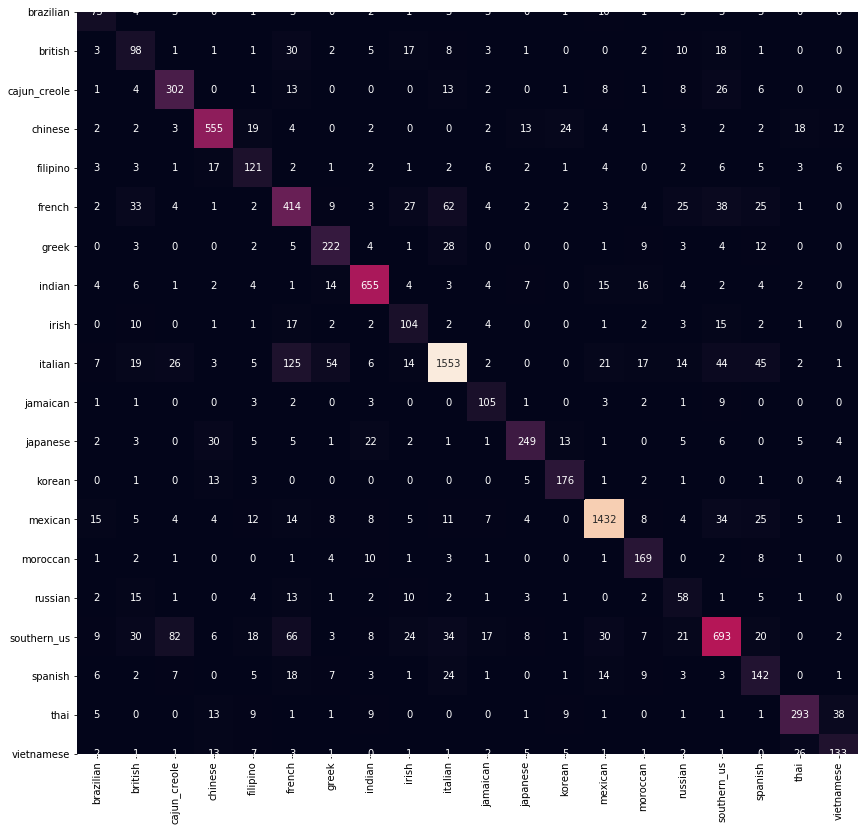

In [54]:
plt.figure(figsize=(14, 14))
classes = unique_labels(y_test, pred)

# tick_marks = np.arange(len(classes))
# plt.xticks(tick_marks, labels= classes, rotation=90)
# plt.yticks(tick_marks, labels= classes, rotation=-45)
plt.title("confusion matrix")

mat = confusion_matrix(y_test, pred)
ax=sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
    
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
ax.set_xticklabels(classes,rotation=90)
ax.set_yticklabels(classes,rotation=0);
plt.savefig('Images/Con_Mat_LR.png')

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   brazilian       0.53      0.63      0.57       116
     british       0.40      0.49      0.44       201
cajun_creole       0.69      0.78      0.73       386
     chinese       0.84      0.83      0.84       668
    filipino       0.54      0.64      0.59       188
      french       0.56      0.63      0.59       661
       greek       0.67      0.76      0.71       294
      indian       0.88      0.88      0.88       748
       irish       0.49      0.62      0.55       167
     italian       0.89      0.79      0.84      1958
    jamaican       0.64      0.80      0.71       131
    japanese       0.83      0.70      0.76       355
      korean       0.75      0.85      0.80       207
     mexican       0.92      0.89      0.91      1606
    moroccan       0.67      0.82      0.74       205
     russian       0.34      0.48      0.40       122
 southern_us       0.76      0.64      0.70      1079
     spanish       0.46    

# Predicciones sobre datos nuevos

In [55]:
data_test = pd.read_json('test.json')
data_test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [56]:
data_test.shape

(9944, 2)

In [57]:
#data_test['ingr_lst'] = data_test['ingredients'].apply(lambda x: [item.replace(' ','') for item in x])
data_test['ingr_str'] = data_test['ingredients'].apply(lambda x: ' '.join(x))
data_test.head()
#data_test.head()
#X_new = data_test['ingr_str']
#X_new = vec.transform(X_new)

,id,ingredients,ingr_str
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",baking powder eggs all-purpose flour raisins m...
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",sugar egg yolks corn starch cream of tartar ba...
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",sausage links fennel bulb fronds olive oil cub...
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",meat cuts file powder smoked sausage okra shri...
4,35687,"[ground black pepper, salt, sausage casings, l...",ground black pepper salt sausage casings leeks...


In [58]:
X = data_test['ingr_str']

y_pred_new = pipeline_best.predict(X)

d = {'id':data_test['id'],
    'ingredients':data_test['ingredients'],
    'predictions':y_pred_new}

predicted_data = pd.DataFrame(d)
predicted_data.sample(10)

,id,ingredients,predictions
4855,48479,"[bacon slices, sausage links, celery, russet p...",british
9446,3249,"[light brown sugar, szechwan peppercorns, chin...",chinese
9418,40076,"[romaine lettuce, chili powder, refried beans,...",mexican
1890,10255,"[turnip greens, hot pepper sauce, sliced carro...",french
2354,3001,"[yellow mustard seeds, ginger, ground turmeric...",indian
7749,6235,"[diced tomatoes, pinto beans, jalapeno chilies...",mexican
2719,23160,"[salt, ice water, unsalted butter, all-purpose...",southern_us
8233,23501,"[green onions, ground cumin, cheddar cheese, s...",mexican
6113,21905,"[pesto, chopped onion, navy beans, cooking spr...",italian
5028,10185,"[celery ribs, vegetable oil, curry paste, fres...",indian


In [59]:
pd.Series(y_pred_new).value_counts(normalize=True)

italian         0.169147
mexican         0.152051
southern_us     0.098753
indian          0.076529
french          0.074316
chinese         0.062751
cajun_creole    0.041734
thai            0.039722
greek           0.033689
japanese        0.030169
spanish         0.028660
british         0.026046
vietnamese      0.023934
russian         0.022928
korean          0.022828
filipino        0.022727
moroccan        0.022627
irish           0.021420
brazilian       0.015286
jamaican        0.014682
dtype: float64

In [60]:
data_train['cuisine'].value_counts(normalize=True)

italian         0.197270
mexican         0.161765
southern_us     0.108708
indian          0.075342
chinese         0.067259
french          0.066554
cajun_creole    0.038880
thai            0.038603
japanese        0.035732
greek           0.029563
spanish         0.024829
korean          0.020900
vietnamese      0.020724
moroccan        0.020623
british         0.020246
filipino        0.018987
irish           0.016796
jamaican        0.013195
russian         0.012314
brazilian       0.011709
Name: cuisine, dtype: float64